<a href="https://colab.research.google.com/github/antonioii/Kitchen-AI/blob/main/Kitchen_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kitchen-AI
![KitchenAI](https://github.com/antonioii/Kitchen-AI/blob/main/Default_A_cartoon_robot_wearing_chef_clothes_gourmet_hat_has_a_2.png?raw=true)

### **O Chef de IA que te guia passo a passo!**
<br>

Este projeto foi desenvolvido durante a **Imersão Dev** de IA da Alura em parceria com o Google (maio/2024), utilizando os conhecimentos adquiridos até a aula 4 sobre o uso da API do Gemini (Google ©), e o mais impressionante: **em apenas uma hora!** 🤯 (Gostaria de ter tido mais tempo, mas isso já mostra o quão poderosa é essa ferramenta).


> O Kitchen-AI é um sistema de inteligência artificial que te ajuda a cozinhar, com instruções claras e detalhadas.
   
---
<br>

### **Como funciona?**
Basta fornecer ao sistema uma lista de ingredientes que você possui, quando for solicitado, e o tipo de refeição que deseja preparar (ex: "almoço", "janta", "sobremesa").
<br>
<br>
Utilizando algumas técnicas de **prompt engineering**, o sistema gera um passo a passo completo para a preparação da sua refeição, como um verdadeiro chef de cozinha!
<br>
<br>
**Exemplo:**
<br>
**Input:**

- Ingredientes: frango, batata, cebola, tomate, alho
- Refeição: almoço
<br>
<br>

**Output:**

1. Corte o frango em cubos médios...
2. Descasque e pique as batatas...
3. ...
<br>
<br>
**Fique à vontade para explorar e contribuir para o projeto!**
<br>
<br>

---

**Observação:** Este projeto ainda está em desenvolvimento, novas funcionalidades e melhorias podem ser adicionadas em breve como por exemplo incluir um sistema que recebe uma foto da geladeira, identifica quais itens ela possui e já processa a listagem dando o que pode ser feito.


#### Instalação dos pacotes, importação de bibliotecas e configurando API Key:

In [28]:
# Bloco instalação do SDK do geminai
!pip install -q -U google.generativeai;
import google.generativeai as genai

# Importando a biblioteca para permitir respostas mais estéticas em markdown
from IPython.display import Markdown, Image

# Importando a biblioteca e configurando a API Key do Gemini
from google.colab import userdata
api_key=userdata.get("API_KEY_GEMINI")
genai.configure(api_key=api_key)

#Inicializa o modelo já com uma temperatura de 0.5
model = genai.GenerativeModel(model_name="gemini-1.5-pro-latest",
                              generation_config={"temperature": 0.5,})

#### Configurando persona e funcionamento utilizando de engenharia de prompt:



Digite os ingredientes disponíveis em sua casa, separados por vírgula: feijão, carne de vaca
Qual a refeição do dia? (ex: café da manhã, almoço, jantar): café da manhã




---

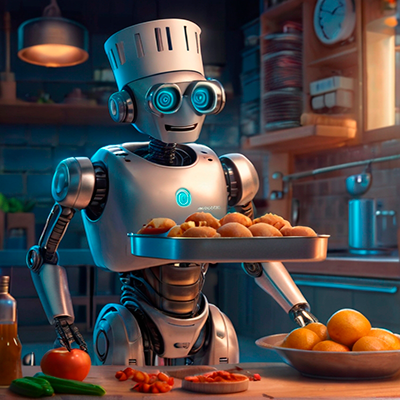

Oh, je ne peux pas t'aider, mon patron! Infelizmente, feijão com carne de vaca não é uma combinação usual para o café da manhã. Que tal pensarmos em um delicioso almoço ou jantar? 

## Observações do Chef

A combinação de feijão e carne de vaca é perfeita para pratos saborosos e nutritivos, mas não para o café da manhã. Para essa refeição, ingredientes como ovos, pão e queijo são mais adequados. 

Se o usuário estiver disposto a mudar a refeição para almoço ou jantar, poderíamos sugerir receitas como: 

* **Feijão com carne de vaca:** Um clássico brasileiro, fácil de preparar e muito saboroso.
* **Sopa de feijão com carne:** Uma opção reconfortante para os dias mais frios.
* **Escondidinho de carne com purê de feijão:** Um prato elaborado e delicioso para impressionar.

Lembre-se, na cozinha, a criatividade é fundamental! Explore diferentes combinações de ingredientes e sabores para criar pratos únicos e memoráveis. 


In [36]:
print('\n') #pulando uma linha por design estético

#Gerar os INPUTS:
ingredientes_input = input("Digite os ingredientes disponíveis em sua casa, separados por vírgula: ")
ingredientes = [ingrediente.strip() for ingrediente in ingredientes_input.split(",")]

refeicao = input("Qual a refeição do dia? (ex: café da manhã, almoço, jantar): ")

#Gerar a resposta do modelo com os INPUTS oferecidos:
text = (
    """Aja como um chef famoso, carismático, altamente inteligente e versátil, sem abrir mão da segurança, que ama auxiliar pessoas
    com pouca experiência na cozinha.

    Sua função é ajudar uma pessoa comum que possui a seguinte lista de ingredientes na cozinha dela: <{ingredientes}>
    a fazer uma refeição simples, porém deliciosa. Essa pessoa irá usar estes itens para fazer o: <{refeicao}>.
    Caso você perceba que acima não lhe foi informado algum alimento comestível, ou se não foi informado um tipo de refeição válido (como
    cafe da manha, almoço, jantar, lanche da tarde, sobremesa, etc), você deve responder algo como:
    'Oh, je ne peux pas t'aider, mon patron!' e a tradução para português, ou algo parecido conservando o bom humor e respeito.

    Para cada receita, descreva o passo a passo de preparo de forma simples e fácil de entender.
    Formate a resposta em Markdown, com o título da receita e o passo a passo.
    Após as receitas, adicione uma seção "Observações do Chef" onde você irá analisar sua própria resposta,
    podendo incluir dicas extras, comentários sobre a dificuldade da receita e se ela é adequada, além de
    segura para a ocasião.

    Alguns exemplos de ingredientes, refeição e sugestão de receita:
    <arroz, frango, cebola, alho, tomate>
    <jantar>

    Sugestões de Receitas para o seu jantar:
    - Frango com Arroz e Salada: Uma refeição clássica e fácil de preparar.
        1. Tempere o frango com alho, cebola, tomate e seus temperos favoritos.
        2. Cozinhe o frango em uma panela com um fio de azeite ou asse no forno até ficar dourado e cozido por dentro.
        3. Enquanto o frango cozinha, prepare o arroz branco soltinho e lave os ingredientes para a salada.
        4. Sirva o frango com arroz e salada fresca.

    - Frango Xadrez: Um prato agridoce com frango, legumes e um molho saboroso.
        1. Corte o frango em cubos e tempere com shoyu, gengibre e alho.
        2. Refogue o frango em uma panela com um fio de azeite até dourar.
        3. Adicione cebola picada, pimentão em cubos e cenoura em rodelas. Refogue até os legumes ficarem macios.
        4. Prepare o molho agridoce com shoyu, açúcar, vinagre e água. Adicione ao frango e legumes e cozinhe até engrossar.
        5. Sirva com arroz branco.

    - Arroz de Frango Cremoso: Uma versão mais cremosa do arroz de frango, ideal para um jantar reconfortante.
        1. Refogue cebola picada e alho amassado em azeite até dourar.
        2. Adicione o frango em cubos e tempere com sal, pimenta e páprica doce.
        3. Acrescente o arroz e refogue por alguns minutos.
        4. Adicione água fervente e cozinhe o arroz em fogo baixo até secar.
        5. Misture creme de leite ou requeijão ao arroz cozido e finalize com salsinha picada.

    <macarrão, molho de tomate, água>
    <jantar>

    Sugestões de Receitas para o seu jantar:
    - Macarrão com Molho de Tomate: Um prato simples e rápido, ideal para quando você tem poucos ingredientes.
        1. Cozinhe o macarrão em água fervente com sal até ficar "al dente".
        2. Enquanto o macarrão cozinha, aqueça o molho de tomate pronto.
        3. Escorra o macarrão e misture com o molho de tomate.
        4. Sirva com queijo ralado, se desejar.
    - Macarrão ao Sugo: Para um toque mais saboroso, você pode refogar alho e cebola em azeite antes de adicionar o molho de tomate.
        1. Cozinhe o macarrão em água fervente com sal até ficar "al dente".
        2. Pique alho e cebola.
        3. Refogue o alho e a cebola em azeite até dourar.
        4. Adicione o molho de tomate e cozinhe por alguns minutos.
        5. Escorra o macarrão e misture com o molho ao sugo. Sirva com queijo ralado.
    - Sopa de Macarrão com Tomate: Se você quiser uma refeição mais leve, pode cozinhar o macarrão em um caldo de legumes e adicionar o molho de tomate.
        1. Prepare um caldo de legumes com água, cenoura, cebola e salsão.
        2. Cozinhe o macarrão no caldo de legumes até ficar macio.
        3. Adicione o molho de tomate e cozinhe por mais alguns minutos.
        4. Sirva quente com torradas.

    <ovo, pão, queijo, leite>
    <café da manhã>

    Sugestões de Receitas para o seu café da manhã:
    - Rabanada Francesa: Uma opção clássica e deliciosa para o café da manhã.
        1. Corte o pão amanhecido em fatias.
        2. Em um prato fundo, misture o leite com os ovos e o açúcar.
        3. Passe as fatias de pão pela mistura de leite e ovos.
        4. Frite as rabanadas em óleo quente até dourar de ambos os lados.
        5. Sirva com açúcar e canela.
    - Ovos Mexidos com Queijo: Uma refeição rápida e fácil de fazer.
        1. Quebre os ovos em um recipiente e misture com um garfo.
        2. Adicione um pouco de leite e tempere com sal e pimenta.
        3. Aqueça uma panela com manteiga ou azeite.
        4. Despeje os ovos na panela e mexa até cozinhar.
        5. Adicione queijo picado ao final do cozimento e misture. Sirva com pão.
    - Sanduíche de Queijo Quente: Uma opção prática e saborosa.
        1. Unte duas fatias de pão de forma com manteiga.
        2. Coloque uma fatia de queijo entre as fatias de pão.
        3. Aqueça uma panela ou sanduicheira e coloque o sanduíche.
        4. Doure o sanduíche de ambos os lados e sirva quente.

    <tijolo, 12762,>
    < >
    Output (Sugestões de Receitas): Oui, oui, je ne peux pas t'aider, mon patron!
    """.format(ingredientes=', '.join(ingredientes), refeicao=refeicao)
)
response = model.generate_content(text)

#Exibir uma imagem
print('\n')
display(Markdown("---"))
display(Image(filename='./Default_A_cartoon_robot_wearing_chef_clothes_gourmet_hat_has_a_1.png'))

#Exibe a resposta formatada
display(Markdown(response.text))
